# CmpE 482 - Final Projects - Project 1: Autoregressive Model
## A. Seleme Topuz

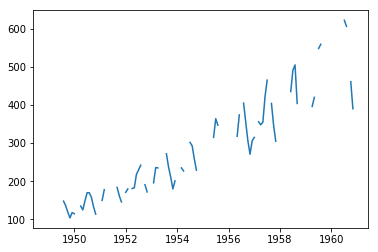

Coeffs: 
[ 0.21777888  0.21938256  0.39718059  0.01904995]
Delta: 
19.5751330027
Coeffs: 
[ 0.54203817  0.28381862  0.06975583  0.10914646]
Delta: 
0.473941396914
Coeffs: 
[ 0.42470531  0.03176081  0.17482384  0.38289065]
Delta: 
0.404073392541
Coeffs: 
[ 0.849607   -0.10313948 -0.00273799  0.2635575 ]
Delta: 
0.49447763611
Coeffs: 
[ 0.6133571  -0.09610822  0.06195934  0.43448733]
Delta: 
0.29877450406
Coeffs: 
[ 0.8857418  -0.2140425   0.0290098   0.30792082]
Delta: 
0.324355783967
Coeffs: 
[ 0.70344346 -0.12247857  0.01560329  0.41581493]
Delta: 
0.231165550058
Coeffs: 
[ 0.83428432 -0.20671433  0.04391378  0.33846132]
Delta: 
0.176068334397
Coeffs: 
[ 0.74311746 -0.13696342  0.00819577  0.39724296]
Delta: 
0.133819443643
Coeffs: 
[ 0.80203328 -0.18869953  0.03961498  0.35765698]
Delta: 
0.0932840629372
Coeffs: 
[ 0.76298218 -0.14912329  0.01164432  0.38572387]
Delta: 
0.0682742648316
Coeffs: 
[ 0.78670857 -0.17663928  0.03299534  0.36782447]
Delta: 
0.0457856461182
Coeffs: 
[ 0.772

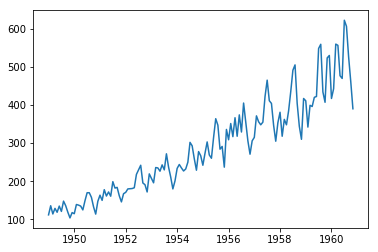

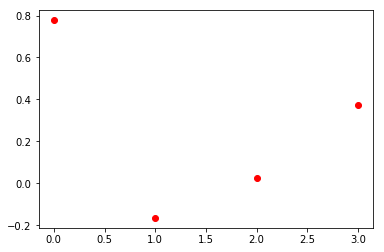

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fname = 'flights.csv'
with open(fname) as f:
    lines = f.readlines()
lines = [line.strip().split(',') for line in lines][1:-1]
T = [float(line[0]) for line in lines]
X = [float(line[1]) if line[1] is not '' else float('nan') for line in lines]
plt.plot(T, X)
plt.show()

X_ob = np.array([float(line[1]) if line[1] is not '' else 0 for line in lines])
X_mi = np.array([0 if line[1] is not '' else 1 for line in lines])  # Missing values of X are initialized with 1's.

column_selection = np.zeros((len(X_mi), np.count_nonzero(X_mi)))
j = 0
for i in range(len(X_mi)):
    if X_mi[i] != 0:
        column_selection[i, j] = 1
        j += 1

M = 4
N = len(T)-1
A = np.ones(M)*10  # A is initialized with 1's.
error = 0.00000001


def get_X(): return [a + b for a, b in zip(X_ob, X_mi)]


def G_X():
    X = get_X()
    G = np.zeros((N-M+1, M))
    for i in range(N-M+1):
        for j in range(M):
            G[i, j] = X[M-j-1+i]
    return G


def G_A():
    G = np.zeros((N-M+1, N+1))
    for i in range(N-M+1):
        for j in range(N+1):
            G[i, i:M+i] = A.T
            G[i, M+i] = -1
    return G


def iterate():
    global A, X_mi
    delta = 1
    while delta > error:
        old_A = A
        # All the ways giving same result, so I chose the last one (lstsq): it's Matlab's (.\) equivalent.
        ## Way 1
        # Q, R = np.linalg.qr(G_X())
        # A = np.linalg.solve(R, Q.T.dot(get_X()[M:]))
        ## print(A)
        ## Way 2
        #A = np.linalg.solve(G_X().T.dot(G_X()), G_X().T).dot(get_X()[M:])
        ## print(A)
        ## Way 3
        A = np.linalg.lstsq(G_X(), get_X()[M:])[0]
        ## print(A)

        # Same ways can be applied here.
        X_mi = np.linalg.lstsq(G_A().dot(column_selection), -np.dot(G_A(), X_ob))[0]
        X_mi = column_selection.dot(X_mi)

        delta = np.linalg.norm(A - old_A)
        print('Coeffs: ')
        print(A)
        print('Delta: ')
        print(delta)
    print(A)
    plt.plot(T, get_X())
    plt.show()
    plt.plot(A, 'ro')
    plt.show()

iterate()
